In [1]:
import missingno as msno #pip install missingno
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from wordcloud import WordCloud


In [2]:
pip install wordcloud matplotlib


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install missingno 

Note: you may need to restart the kernel to use updated packages.


In [4]:
df=pd.read_csv('survey.csv')

In [5]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [6]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

* 'Timestamp' -> 'Zaman Damgası', 
* 'Age' -> 'Yaş', 
* 'Gender' -> 'Cinsiyet', 
* 'Country' -> 'Ülke', 
* 'state' -> 'Eyalet', 
* 'self_employed' -> 'Serbest Çalışan', 
* 'family_history' -> 'Aile Geçmişi', 
* 'treatment' -> 'Tedavi', 
* 'work_interfere' -> 'İş Müdahalesi', 
* 'no_employees' -> 'Çalışan Sayısı', 
* 'remote_work' -> 'Uzaktan Çalışma', 
* 'tech_company' -> 'Teknoloji Şirketi', 
* 'benefits' -> 'Faydalar', 
* 'care_options' -> 'Bakım Seçenekleri', 
* 'wellness_program' -> 'Sağlık Programı', 
* 'seek_help' -> 'Yardım Arama', 
* 'anonymity' -> 'Anonimlik', 
* 'leave' -> 'İzin', 
* 'mental_health_consequence' -> 'Ruh Sağlığı Sonucu', 
* 'phys_health_consequence' -> 'Fiziksel Sağlık Sonucu', 
* 'coworkers' -> 'İş Arkadaşları', 
* 'supervisor' -> 'Yönetici', 
* 'mental_health_interview' -> 'Ruh Sağlığı Görüşmesi', 
* 'phys_health_interview' -> 'Fiziksel Sağlık Görüşmesi', 
* 'mental_vs_physical' -> 'Ruhsal vs Fiziksel', 
* 'obs_consequence' -> 'Gözlemlenen Sonuç', 
* 'comments' -> 'Yorumlar'

In [7]:
df.shape

(1259, 27)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [9]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [10]:
df.columns = df.columns.str.strip().str.lower()

In [11]:
df.columns

Index(['timestamp', 'age', 'gender', 'country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

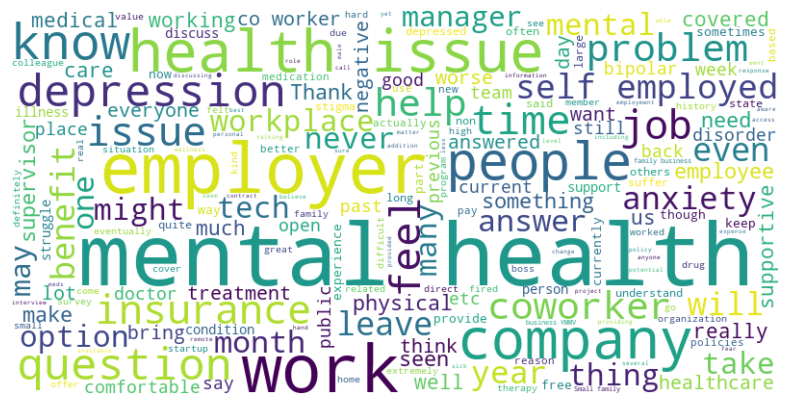

In [12]:
comments=df['comments']

# Yorumlarda eksik (NaN) değerleri temizle ve yalnızca metin olanları seç
comments = df['comments'].dropna().astype(str)

# Yorumları birleştir ve tüm metni tek bir string haline getir
text = " ".join(comment for comment in comments)

# Kelime bulutunu oluştur
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Kelime bulutunu görselleştir
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Eksenleri gizle
plt.show()


In [13]:
df.drop(['timestamp','comments'], axis=1, inplace=True)

In [14]:
df.columns  

Index(['age', 'gender', 'country', 'state', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [15]:
df.shape

(1259, 25)

In [16]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    -----
        dataframe: pandas.DataFrame
            Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
            Numerik fakat kategorik olan değişkenler için sınıf eşik değeri (varsayılan: 10)
        car_th: int, optional
            Kategorik fakat kardinal değişkenler için sınıf eşik değeri (varsayılan: 20)

    Returns
    -----
        cat_cols: list
            Kategorik değişken listesi
        num_cols: list
            Numerik değişken listesi
        cat_but_car: list
            Kategorik fakat kardinal değişken listesi
    """
    # Kategorik sütunlar
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtype == "object"]
    
    # Sayısal ama kategorik olan sütunlar
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtype != "object"]
    
    # Kategorik ama sürekli olan sütunlar
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtype == "object"]
    
    # Kategorik sütunları güncelleme
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # Sayısal sütunlar
    num_cols = [col for col in dataframe.columns if dataframe[col].dtype != "object"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"cat_but_car: {len(cat_but_car)}")
    print(f"num_but_cat: {len(num_but_cat)}")

    return cat_cols, num_cols, cat_but_car

In [17]:
cat_cols, num_cols, cat_but_car=grab_col_names(df)

Observations: 1259
Variables: 25
cat_cols: 21
num_cols: 1
cat_but_car: 3
num_but_cat: 0


In [18]:
cat_cols

['self_employed',
 'family_history',
 'treatment',
 'work_interfere',
 'no_employees',
 'remote_work',
 'tech_company',
 'benefits',
 'care_options',
 'wellness_program',
 'seek_help',
 'anonymity',
 'leave',
 'mental_health_consequence',
 'phys_health_consequence',
 'coworkers',
 'supervisor',
 'mental_health_interview',
 'phys_health_interview',
 'mental_vs_physical',
 'obs_consequence']

In [19]:
df.head()

,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        1259 non-null   int64 
 1   gender                     1259 non-null   object
 2   country                    1259 non-null   object
 3   state                      744 non-null    object
 4   self_employed              1241 non-null   object
 5   family_history             1259 non-null   object
 6   treatment                  1259 non-null   object
 7   work_interfere             995 non-null    object
 8   no_employees               1259 non-null   object
 9   remote_work                1259 non-null   object
 10  tech_company               1259 non-null   object
 11  benefits                   1259 non-null   object
 12  care_options               1259 non-null   object
 13  wellness_program           1259 non-null   object
 14  seek_hel

In [21]:
df['gender'].value_counts()

gender
Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1
male leaning androgynous                            1
Neuter               

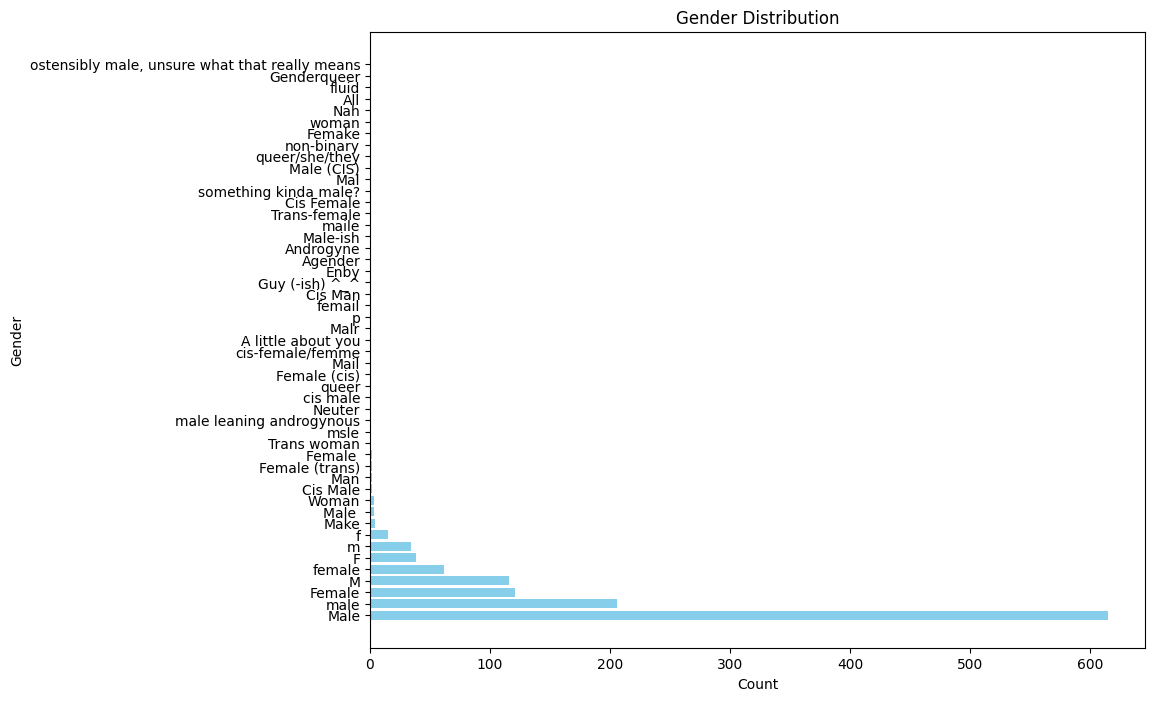

In [22]:
# Verileri görselleştirme
plt.figure(figsize=(10, 8))
plt.barh(df['gender'].value_counts().index, df['gender'].value_counts().values, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Gender')
plt.title('Gender Distribution')
plt.show()

In [23]:
# Temizleme ve standartlaştırma fonksiyonu
def standardize_gender(gender):
    gender = gender.strip().lower()
    if gender in ['male', 'm', 'man', 'cis male', 'msle', 'make', 'mail', 'ostensibly male, unsure what that really means']:
        return 'Male'
    elif gender in ['female', 'f', 'woman', 'trans woman', 'female (trans)', 'female (cis)', 'cis-female/femme']:
        return 'Female'
    elif gender in ['genderqueer', 'fluid', 'neuter', 'queer', 'all', 'male leaning androgynous']:
        return 'Other'
    else:
        return 'Unknown'

# 'gender' sütununu standartlaştırma
df['gender_standardized'] = df['gender'].apply(standardize_gender)


In [24]:
df = df.drop(columns=['gender'])
df.head()

,age,country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,gender_standardized
0,37,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,Female
1,44,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,Male
2,32,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,Male
3,31,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,Male
4,31,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,Male


In [25]:
df['gender_standardized'].value_counts()

gender_standardized
Male       986
Female     247
Unknown     20
Other        6
Name: count, dtype: int64

In [26]:
df = df[~df['gender_standardized'].isin(['Other', 'Unknown'])]

In [27]:
df['gender_standardized'].value_counts()

gender_standardized
Male      986
Female    247
Name: count, dtype: int64

In [28]:
binary_cols=[col for col in df.columns if df[col].dtype not in [int, float] 
             and df[col].nunique()==2]

In [29]:
binary_cols

['self_employed',
 'family_history',
 'treatment',
 'remote_work',
 'tech_company',
 'obs_consequence',
 'gender_standardized']

In [30]:
# Benzersiz değerleri öğrenmek için
for col in binary_cols:
    unique_values = df[col].unique()
    print(f"{col} benzersiz değerleri: {unique_values}")


self_employed benzersiz değerleri: [nan 'Yes' 'No']
family_history benzersiz değerleri: ['No' 'Yes']
treatment benzersiz değerleri: ['Yes' 'No']
remote_work benzersiz değerleri: ['No' 'Yes']
tech_company benzersiz değerleri: ['Yes' 'No']
obs_consequence benzersiz değerleri: ['No' 'Yes']
gender_standardized benzersiz değerleri: ['Female' 'Male']


In [31]:
nan_count = df['self_employed'].isna().sum()
print(f"self_employed kolonu için NaN değer sayısı: {nan_count}")

self_employed kolonu için NaN değer sayısı: 18


In [32]:
# self_employed kolonunda NaN olan satırları silmek için
df = df.dropna(subset=['self_employed'])

In [33]:
def label_encoder(dataframe, binary_col):
    labelencoder=LabelEncoder()
    dataframe[binary_col]=labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [34]:
for col in binary_cols:
    label_encoder(df,col)

In [35]:
df.head()

,age,country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,gender_standardized
18,46,United States,MD,1,1,0,Sometimes,1-5,1,1,...,Very easy,No,No,Yes,Yes,No,Yes,Yes,1,1
19,36,France,NaN,1,1,0,NaN,6-25,1,1,...,Somewhat easy,No,No,Some of them,Some of them,Maybe,Maybe,Don't know,0,1
20,29,United States,NY,0,1,1,Sometimes,100-500,0,1,...,Somewhat difficult,Maybe,No,Some of them,Some of them,No,No,No,0,1
21,31,United States,NC,1,0,0,Never,1-5,1,1,...,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,Yes,0,1
22,46,United States,MA,0,0,1,Often,26-100,1,1,...,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,0,1


In [36]:
df[binary_cols].head()

,self_employed,family_history,treatment,remote_work,tech_company,obs_consequence,gender_standardized
18,1,1,0,1,1,1,1
19,1,1,0,1,1,0,1
20,0,1,1,0,1,0,1
21,1,0,0,1,1,0,1
22,0,0,1,1,1,0,1


In [37]:
df['mental_health_consequence'].value_counts()

mental_health_consequence
No       472
Maybe    463
Yes      280
Name: count, dtype: int64

In [38]:
for col in df.columns:
    print(col, ":" ,df[col].unique())

age : [   46    36    29    31    41    33    35    34    37    32    30    42
    40    27    38    50    24    18    28    26    22    44    23    19
    25    39    45    21   -29    43    56    60    54   329    55    48
    20    57    58    47    62    51    65    49 -1726     5    53    61
    11    72]
country : ['United States' 'France' 'United Kingdom' 'Canada' 'Portugal'
 'Netherlands' 'Switzerland' 'Poland' 'Australia' 'Germany' 'Mexico'
 'Brazil' 'Slovenia' 'Costa Rica' 'Austria' 'Ireland' 'India'
 'South Africa' 'Russia' 'Bulgaria' 'Sweden' 'Colombia' 'Latvia' 'Romania'
 'Belgium' 'New Zealand' 'Spain' 'Finland' 'Uruguay' 'Israel' 'Italy'
 'Bosnia and Herzegovina' 'Hungary' 'Singapore' 'Japan' 'Nigeria'
 'Croatia' 'Norway' 'Thailand' 'Denmark' 'Greece' 'Moldova' 'Georgia'
 'China' 'Czech Republic' 'Philippines']
state : ['MD' nan 'NY' 'NC' 'MA' 'IA' 'CA' 'TN' 'OH' 'PA' 'WA' 'WI' 'IN' 'TX' 'MI'
 'IL' 'UT' 'NM' 'OR' 'FL' 'MN' 'MO' 'AZ' 'CT' 'CO' 'GA' 'DC' 'NE' 'WV'
 'OK' 'K

In [39]:
df.isnull().sum()   

age                            0
country                        0
state                        495
self_employed                  0
family_history                 0
treatment                      0
work_interfere               260
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
gender_standardized            0
dtype: int64

In [40]:
df.drop(['state'], axis=1, inplace=True)

In [41]:
df['work_interfere'].value_counts()

work_interfere
Sometimes    447
Never        204
Rarely       166
Often        138
Name: count, dtype: int64

In [42]:
df = df.dropna(subset=['work_interfere'])

In [43]:
df.shape

(955, 24)

In [44]:
#ohe_cols=[col for col in df.columns if 10>=df[col].nunique()>2]

Frekanslar:

In [45]:
for col in df.columns:
    print(col, ":" ,df[col].value_counts())

age : age
 32      64
 29      59
 26      59
 28      53
 34      53
 33      50
 30      50
 27      48
 31      45
 25      45
 35      44
 23      38
 37      32
 36      32
 24      31
 38      31
 40      28
 39      25
 43      20
 41      18
 42      16
 22      15
 21      13
 45      11
 46      11
 44       8
 19       6
 18       5
 48       5
 20       5
 56       4
 51       4
 50       4
 49       4
 54       3
 55       3
 57       3
 53       1
 72       1
 11       1
 61       1
 62       1
-1726     1
 47       1
 58       1
 329      1
 60       1
Name: count, dtype: int64
country : country
United States             587
United Kingdom            134
Canada                     57
Germany                    31
Ireland                    23
Australia                  20
Netherlands                19
New Zealand                 8
Poland                      7
India                       5
Switzerland                 5
South Africa                5
Sweden                

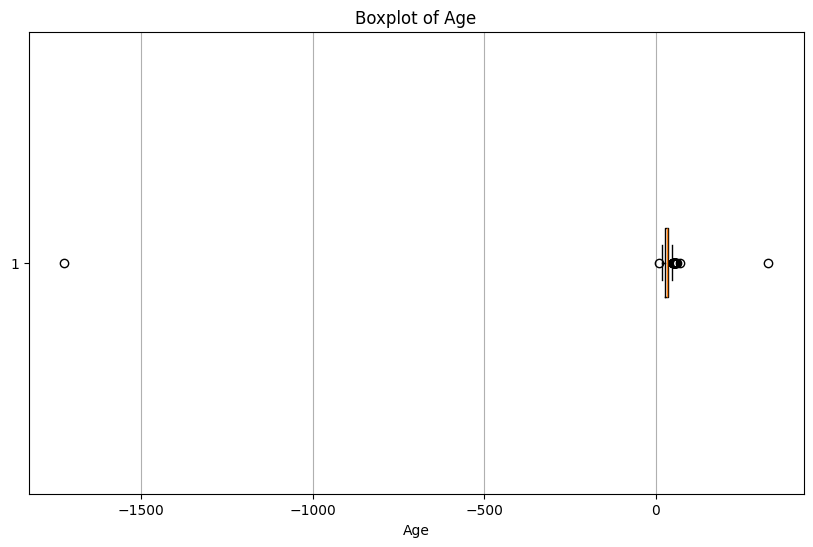

In [46]:
# 'age' sütununu boxplot ile çizdirme
plt.figure(figsize=(10, 6))
plt.boxplot(df['age'], vert=False)  # Vert=False, yatay kutu grafiği çizer
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.grid(axis='x')  # Yatay eksende ızgara
plt.show()

In [47]:
# IQR hesaplama
Q1 = df['age'].quantile(0.25)  # 1. çeyrek
Q3 = df['age'].quantile(0.75)  # 3. çeyrek
IQR = Q3 - Q1  # Interquartile range

# Aykırı değerleri tanımlama
lower_bound = Q1 - 1.5 * IQR  # Alt sınır
upper_bound = Q3 + 1.5 * IQR  # Üst sınır

# Aykırı değerleri filtreleme
outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]

# Aykırı değerleri görüntüleme
print("Aykırı değerler:")
outliers

Aykırı değerler:


,age,country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,gender_standardized
294,56,United States,0,0,1,Never,More than 1000,0,1,Yes,...,Don't know,No,Maybe,Yes,Some of them,No,Maybe,Don't know,0,1
347,54,United States,0,1,1,Never,More than 1000,0,1,Don't know,...,Don't know,No,No,No,Yes,No,No,Don't know,0,1
364,329,United States,0,0,1,Often,6-25,1,1,Yes,...,Don't know,Maybe,No,Some of them,No,No,No,No,0,1
372,55,United States,0,1,1,Rarely,More than 1000,0,1,Yes,...,Very easy,No,No,Yes,Yes,No,No,Yes,0,1
419,55,United States,0,1,1,Sometimes,1-5,1,1,No,...,Don't know,Yes,Maybe,No,No,No,No,No,1,1
466,57,United States,0,1,1,Rarely,More than 1000,0,1,Yes,...,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,0,1
471,58,United States,0,0,1,Rarely,More than 1000,0,1,Yes,...,Somewhat easy,Maybe,No,Some of them,Yes,No,Yes,Yes,0,1
475,57,United States,0,0,1,Sometimes,More than 1000,0,1,Yes,...,Don't know,Maybe,Maybe,No,No,No,Maybe,Don't know,0,1
498,54,United Kingdom,0,0,1,Sometimes,More than 1000,1,0,No,...,Very easy,No,No,Yes,Yes,Maybe,Maybe,No,0,1
520,62,United States,0,0,0,Never,More than 1000,0,1,Yes,...,Don't know,Maybe,No,Some of them,Yes,Maybe,Maybe,Yes,0,1


In [48]:
outliers.shape

(30, 24)

In [49]:
df = df[~((df['age'] < lower_bound) | (df['age'] > upper_bound))]

In [50]:
df.shape

(925, 24)

In [51]:
# Frekansı düşük olanları "Other" olarak gruplama
# Ülke frekanslarını say
country_counts = df['country'].value_counts()
# Eşik değeri belirle
threshold = 5

# "Other" kategorisi için frekansı düşük olanları değiştir
df['country'] = df['country'].where(df['country'].isin(country_counts[country_counts > threshold].index), 'Other')




In [52]:
df['country'].value_counts()

country
United States     565
United Kingdom    130
Other              66
Canada             57
Germany            31
Ireland            23
Australia          20
Netherlands        19
Poland              7
New Zealand         7
Name: count, dtype: int64

In [53]:
# LabelEncoder nesnesi oluştur
le = LabelEncoder()

# Encoding uygula
df['country_encoded'] = le.fit_transform(df['country'])

In [54]:
df[['country', 'country_encoded']].value_counts()


country         country_encoded
United States   9                  565
United Kingdom  8                  130
Other           6                   66
Canada          1                   57
Germany         2                   31
Ireland         3                   23
Australia       0                   20
Netherlands     4                   19
New Zealand     5                    7
Poland          7                    7
Name: count, dtype: int64

| Country         | Country Encoded |
|------------------|------------------|
| United States     | 9                |
| United Kingdom    | 8                |
| Other             | 6                |
| Canada            | 1                |
| Germany           | 2                |
| Ireland           | 3                |
| Australia         | 0                |
| Netherlands       | 4                |
| New Zealand       | 5                |
| Poland            | 7                |


In [55]:
df.drop(['country'], axis=1, inplace=True)

In [56]:
df.head()

,age,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,gender_standardized,country_encoded
18,46,1,1,0,Sometimes,1-5,1,1,Yes,Not sure,...,No,No,Yes,Yes,No,Yes,Yes,1,1,9
20,29,0,1,1,Sometimes,100-500,0,1,Yes,Yes,...,Maybe,No,Some of them,Some of them,No,No,No,0,1,9
21,31,1,0,0,Never,1-5,1,1,No,No,...,No,No,Some of them,Some of them,No,Maybe,Yes,0,1,9
22,46,0,0,1,Often,26-100,1,1,Yes,Yes,...,Maybe,No,Some of them,Yes,No,Maybe,No,0,1,9
23,41,0,0,1,Never,More than 1000,0,0,Don't know,No,...,Maybe,No,No,No,No,Yes,Don't know,0,1,9


'work_interfere sutunu asagıdaki gibi olabilri:
* "Never" → 0
* "Rarely" → 1
* "Sometimes" → 2
* "Often" → 3

In [57]:
# Kategorik veri tipi tanımlama
df['work_interfere'] = pd.Categorical(df['work_interfere'], 
                                       categories=['Never', 'Rarely', 'Sometimes', 'Often'], 
                                       ordered=True)

# Kategorileri sayısal forma dönüştürme
df['work_interfere_encoded'] = df['work_interfere'].cat.codes

# Sonuçları görüntüle
df.head()

,age,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,gender_standardized,country_encoded,work_interfere_encoded
18,46,1,1,0,Sometimes,1-5,1,1,Yes,Not sure,...,No,Yes,Yes,No,Yes,Yes,1,1,9,2
20,29,0,1,1,Sometimes,100-500,0,1,Yes,Yes,...,No,Some of them,Some of them,No,No,No,0,1,9,2
21,31,1,0,0,Never,1-5,1,1,No,No,...,No,Some of them,Some of them,No,Maybe,Yes,0,1,9,0
22,46,0,0,1,Often,26-100,1,1,Yes,Yes,...,No,Some of them,Yes,No,Maybe,No,0,1,9,3
23,41,0,0,1,Never,More than 1000,0,0,Don't know,No,...,No,No,No,No,Yes,Don't know,0,1,9,0


In [58]:
df['work_interfere_encoded'].value_counts()

work_interfere_encoded
2    438
0    193
1    159
3    135
Name: count, dtype: int64

In [59]:
df.drop(['work_interfere'], axis=1, inplace=True)

In [60]:
df.shape

(925, 24)

In [61]:
df.head()

,age,self_employed,family_history,treatment,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,...,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,gender_standardized,country_encoded,work_interfere_encoded
18,46,1,1,0,1-5,1,1,Yes,Not sure,Yes,...,No,Yes,Yes,No,Yes,Yes,1,1,9,2
20,29,0,1,1,100-500,0,1,Yes,Yes,No,...,No,Some of them,Some of them,No,No,No,0,1,9,2
21,31,1,0,0,1-5,1,1,No,No,No,...,No,Some of them,Some of them,No,Maybe,Yes,0,1,9,0
22,46,0,0,1,26-100,1,1,Yes,Yes,No,...,No,Some of them,Yes,No,Maybe,No,0,1,9,3
23,41,0,0,1,More than 1000,0,0,Don't know,No,No,...,No,No,No,No,Yes,Don't know,0,1,9,0


In [62]:
df['no_employees'].value_counts()   

no_employees
26-100            215
6-25              206
More than 1000    202
100-500           133
1-5               127
500-1000           42
Name: count, dtype: int64

In [63]:
employee_mapping = {
    '1-5': 0,
    '6-25': 1,
    '26-100': 2,
    '100-500': 3,
    '500-1000': 4,
    'More than 1000': 5
}

df['no_employees_encoded'] = df['no_employees'].map(employee_mapping)

In [64]:
df.head()

,age,self_employed,family_history,treatment,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,...,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,gender_standardized,country_encoded,work_interfere_encoded,no_employees_encoded
18,46,1,1,0,1-5,1,1,Yes,Not sure,Yes,...,Yes,Yes,No,Yes,Yes,1,1,9,2,0
20,29,0,1,1,100-500,0,1,Yes,Yes,No,...,Some of them,Some of them,No,No,No,0,1,9,2,3
21,31,1,0,0,1-5,1,1,No,No,No,...,Some of them,Some of them,No,Maybe,Yes,0,1,9,0,0
22,46,0,0,1,26-100,1,1,Yes,Yes,No,...,Some of them,Yes,No,Maybe,No,0,1,9,3,2
23,41,0,0,1,More than 1000,0,0,Don't know,No,No,...,No,No,No,Yes,Don't know,0,1,9,0,5


In [65]:
df.drop(['no_employees'], axis=1, inplace=True)

In [66]:
# Sütun aralığını seçme
start_col = 'tech_company'
end_col = 'mental_vs_physical'

# Aralıkta kalan tüm sütunları almak için
df_selected = df.loc[:, start_col:end_col]

df_selected.head()

,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical
18,1,Yes,Not sure,Yes,Don't know,Yes,Very easy,No,No,Yes,Yes,No,Yes,Yes
20,1,Yes,Yes,No,No,No,Somewhat difficult,Maybe,No,Some of them,Some of them,No,No,No
21,1,No,No,No,No,Yes,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,Yes
22,1,Yes,Yes,No,No,Don't know,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No
23,0,Don't know,No,No,Don't know,Don't know,Don't know,Maybe,No,No,No,No,Yes,Don't know


In [67]:
df_selected.nunique()

tech_company                 2
benefits                     3
care_options                 3
wellness_program             3
seek_help                    3
anonymity                    3
leave                        5
mental_health_consequence    3
phys_health_consequence      3
coworkers                    3
supervisor                   3
mental_health_interview      3
phys_health_interview        3
mental_vs_physical           3
dtype: int64

In [68]:
# Benzersiz değerler ve sayıları için boş bir liste oluştur
unique_values_list = []

# Her sütun için benzersiz değerleri ve sayıları al
for column in df_selected.columns:
    value_counts = df_selected[column].value_counts()
    for index, count in value_counts.items():
        unique_values_list.append({'Column': column, 'Value': index, 'Count': count})

# Sonuçları DataFrame olarak oluştur
unique_values_df = pd.DataFrame(unique_values_list)
unique_values_df


,Column,Value,Count
0,tech_company,1,754
1,tech_company,0,171
2,benefits,Yes,375
3,benefits,Don't know,277
4,benefits,No,273
5,care_options,Yes,358
6,care_options,No,353
7,care_options,Not sure,214
8,wellness_program,No,622
9,wellness_program,Yes,179


In [69]:
df['tech_company'].value_counts()   

tech_company
1    754
0    171
Name: count, dtype: int64

In [70]:
df = df[df['tech_company'] == 1]
df['tech_company'].value_counts()   

tech_company
1    754
Name: count, dtype: int64

In [71]:
df.head()

,age,self_employed,family_history,treatment,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,...,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,gender_standardized,country_encoded,work_interfere_encoded,no_employees_encoded
18,46,1,1,0,1,1,Yes,Not sure,Yes,Don't know,...,Yes,Yes,No,Yes,Yes,1,1,9,2,0
20,29,0,1,1,0,1,Yes,Yes,No,No,...,Some of them,Some of them,No,No,No,0,1,9,2,3
21,31,1,0,0,1,1,No,No,No,No,...,Some of them,Some of them,No,Maybe,Yes,0,1,9,0,0
22,46,0,0,1,1,1,Yes,Yes,No,No,...,Some of them,Yes,No,Maybe,No,0,1,9,3,2
24,33,0,1,1,0,1,Yes,Not sure,Don't know,Yes,...,Yes,Yes,No,Yes,Don't know,0,1,9,1,2


In [72]:
df.shape

(754, 24)

In [73]:
df.drop(['tech_company'], axis=1, inplace=True)

In [74]:
df.head()

,age,self_employed,family_history,treatment,remote_work,benefits,care_options,wellness_program,seek_help,anonymity,...,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,gender_standardized,country_encoded,work_interfere_encoded,no_employees_encoded
18,46,1,1,0,1,Yes,Not sure,Yes,Don't know,Yes,...,Yes,Yes,No,Yes,Yes,1,1,9,2,0
20,29,0,1,1,0,Yes,Yes,No,No,No,...,Some of them,Some of them,No,No,No,0,1,9,2,3
21,31,1,0,0,1,No,No,No,No,Yes,...,Some of them,Some of them,No,Maybe,Yes,0,1,9,0,0
22,46,0,0,1,1,Yes,Yes,No,No,Don't know,...,Some of them,Yes,No,Maybe,No,0,1,9,3,2
24,33,0,1,1,0,Yes,Not sure,Don't know,Yes,Yes,...,Yes,Yes,No,Yes,Don't know,0,1,9,1,2


In [75]:
df['benefits'].value_counts()

benefits
Yes           294
No            234
Don't know    226
Name: count, dtype: int64

In [76]:
# Değer eşleştirmesi
benefits_mapping = {
    'Yes': 1,
    'No': 0,
    "Don't know": 2
}

# Sayısal dönüşüm
df['benefits_encoded'] = df['benefits'].map(benefits_mapping)

# Sonuçları kontrol etme
df['benefits_encoded'].value_counts()


benefits_encoded
1    294
0    234
2    226
Name: count, dtype: int64

In [77]:
df.drop(['benefits'], axis=1, inplace=True)

In [78]:
df['care_options'].value_counts()

care_options
No          288
Yes         285
Not sure    181
Name: count, dtype: int64

In [79]:
# Değer eşleştirmesi
care_options_mapping = {
    'Yes': 1,
    'No': 0,
    'Not sure': 2
}

# Sayısal dönüşüm
df['care_options_encoded'] = df['care_options'].map(care_options_mapping)

# Sonuçları kontrol etme
df['care_options_encoded'].value_counts()


care_options_encoded
0    288
1    285
2    181
Name: count, dtype: int64

In [80]:
df.drop(['care_options'], axis=1, inplace=True)

In [81]:
df['wellness_program'].value_counts()

wellness_program
No            519
Yes           125
Don't know    110
Name: count, dtype: int64

In [82]:
wellness_program_mapping = {
    'Yes': 1,
    'No': 0,
    'Don\'t know': 2
}

# Sayısal dönüşüm
df['wellness_program_encoded'] = df['wellness_program'].map(wellness_program_mapping)


In [83]:
df.head()

,age,self_employed,family_history,treatment,remote_work,wellness_program,seek_help,anonymity,leave,mental_health_consequence,...,phys_health_interview,mental_vs_physical,obs_consequence,gender_standardized,country_encoded,work_interfere_encoded,no_employees_encoded,benefits_encoded,care_options_encoded,wellness_program_encoded
18,46,1,1,0,1,Yes,Don't know,Yes,Very easy,No,...,Yes,Yes,1,1,9,2,0,1,2,1
20,29,0,1,1,0,No,No,No,Somewhat difficult,Maybe,...,No,No,0,1,9,2,3,1,1,0
21,31,1,0,0,1,No,No,Yes,Somewhat difficult,No,...,Maybe,Yes,0,1,9,0,0,0,0,0
22,46,0,0,1,1,No,No,Don't know,Don't know,Maybe,...,Maybe,No,0,1,9,3,2,1,1,0
24,33,0,1,1,0,Don't know,Yes,Yes,Don't know,No,...,Yes,Don't know,0,1,9,1,2,1,2,2


In [84]:
df.drop(['wellness_program'], axis=1, inplace=True)

In [85]:
df['seek_help'].value_counts()

seek_help
No            403
Don't know    213
Yes           138
Name: count, dtype: int64

In [86]:
seek_help_mapping = {
    'Yes': 1,
    'No': 0,
    'Don\'t know': 2
}

# Sayısal dönüşüm
df['seek_help_encoded'] = df['seek_help'].map(seek_help_mapping)
df.head()

,age,self_employed,family_history,treatment,remote_work,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,...,mental_vs_physical,obs_consequence,gender_standardized,country_encoded,work_interfere_encoded,no_employees_encoded,benefits_encoded,care_options_encoded,wellness_program_encoded,seek_help_encoded
18,46,1,1,0,1,Don't know,Yes,Very easy,No,No,...,Yes,1,1,9,2,0,1,2,1,2
20,29,0,1,1,0,No,No,Somewhat difficult,Maybe,No,...,No,0,1,9,2,3,1,1,0,0
21,31,1,0,0,1,No,Yes,Somewhat difficult,No,No,...,Yes,0,1,9,0,0,0,0,0,0
22,46,0,0,1,1,No,Don't know,Don't know,Maybe,No,...,No,0,1,9,3,2,1,1,0,0
24,33,0,1,1,0,Yes,Yes,Don't know,No,No,...,Don't know,0,1,9,1,2,1,2,2,1


In [87]:
df.drop(['seek_help'], axis=1, inplace=True)

In [88]:
df['anonymity'].value_counts()

anonymity
Don't know    496
Yes           220
No             38
Name: count, dtype: int64

In [89]:
# Değer eşleştirmesi
anonymity_mapping = {
    'Yes': 1,
    'No': 0,
    'Don\'t know': 2
}

# Sayısal dönüşüm
df['anonymity_encoded'] = df['anonymity'].map(anonymity_mapping)

In [90]:
df.head()

,age,self_employed,family_history,treatment,remote_work,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,...,obs_consequence,gender_standardized,country_encoded,work_interfere_encoded,no_employees_encoded,benefits_encoded,care_options_encoded,wellness_program_encoded,seek_help_encoded,anonymity_encoded
18,46,1,1,0,1,Yes,Very easy,No,No,Yes,...,1,1,9,2,0,1,2,1,2,1
20,29,0,1,1,0,No,Somewhat difficult,Maybe,No,Some of them,...,0,1,9,2,3,1,1,0,0,0
21,31,1,0,0,1,Yes,Somewhat difficult,No,No,Some of them,...,0,1,9,0,0,0,0,0,0,1
22,46,0,0,1,1,Don't know,Don't know,Maybe,No,Some of them,...,0,1,9,3,2,1,1,0,0,2
24,33,0,1,1,0,Yes,Don't know,No,No,Yes,...,0,1,9,1,2,1,2,2,1,1


In [91]:
df.drop(['anonymity'], axis=1, inplace=True)

In [92]:
df['leave'].value_counts()

leave
Don't know            316
Somewhat easy         165
Very easy             127
Somewhat difficult     77
Very difficult         69
Name: count, dtype: int64

In [93]:
# Değer eşleştirmesi
leave_mapping = {
    'Very difficult': 0,
    'Somewhat difficult': 1,
    'Somewhat easy': 2,
    'Very easy': 3,
    'Don\'t know': 4
}

# Sayısal dönüşüm
df['leave_encoded'] = df['leave'].map(leave_mapping)

df.head()


,age,self_employed,family_history,treatment,remote_work,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,...,gender_standardized,country_encoded,work_interfere_encoded,no_employees_encoded,benefits_encoded,care_options_encoded,wellness_program_encoded,seek_help_encoded,anonymity_encoded,leave_encoded
18,46,1,1,0,1,Very easy,No,No,Yes,Yes,...,1,9,2,0,1,2,1,2,1,3
20,29,0,1,1,0,Somewhat difficult,Maybe,No,Some of them,Some of them,...,1,9,2,3,1,1,0,0,0,1
21,31,1,0,0,1,Somewhat difficult,No,No,Some of them,Some of them,...,1,9,0,0,0,0,0,0,1,1
22,46,0,0,1,1,Don't know,Maybe,No,Some of them,Yes,...,1,9,3,2,1,1,0,0,2,4
24,33,0,1,1,0,Don't know,No,No,Yes,Yes,...,1,9,1,2,1,2,2,1,1,4


In [94]:
df.drop(['leave'], axis=1, inplace=True)

In [95]:
mental_health_mapping = {
    'Yes': 1,
    'Maybe': 2,
    'No': 0
}

# Sayısal dönüşüm
df['mental_health_consequence_encoded'] = df['mental_health_consequence'].map(mental_health_mapping)
df.head()

,age,self_employed,family_history,treatment,remote_work,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,...,country_encoded,work_interfere_encoded,no_employees_encoded,benefits_encoded,care_options_encoded,wellness_program_encoded,seek_help_encoded,anonymity_encoded,leave_encoded,mental_health_consequence_encoded
18,46,1,1,0,1,No,No,Yes,Yes,No,...,9,2,0,1,2,1,2,1,3,0
20,29,0,1,1,0,Maybe,No,Some of them,Some of them,No,...,9,2,3,1,1,0,0,0,1,2
21,31,1,0,0,1,No,No,Some of them,Some of them,No,...,9,0,0,0,0,0,0,1,1,0
22,46,0,0,1,1,Maybe,No,Some of them,Yes,No,...,9,3,2,1,1,0,0,2,4,2
24,33,0,1,1,0,No,No,Yes,Yes,No,...,9,1,2,1,2,2,1,1,4,0


In [96]:
df.head()

,age,self_employed,family_history,treatment,remote_work,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,...,country_encoded,work_interfere_encoded,no_employees_encoded,benefits_encoded,care_options_encoded,wellness_program_encoded,seek_help_encoded,anonymity_encoded,leave_encoded,mental_health_consequence_encoded
18,46,1,1,0,1,No,No,Yes,Yes,No,...,9,2,0,1,2,1,2,1,3,0
20,29,0,1,1,0,Maybe,No,Some of them,Some of them,No,...,9,2,3,1,1,0,0,0,1,2
21,31,1,0,0,1,No,No,Some of them,Some of them,No,...,9,0,0,0,0,0,0,1,1,0
22,46,0,0,1,1,Maybe,No,Some of them,Yes,No,...,9,3,2,1,1,0,0,2,4,2
24,33,0,1,1,0,No,No,Yes,Yes,No,...,9,1,2,1,2,2,1,1,4,0


In [97]:
df.drop(['mental_health_consequence'], axis=1, inplace=True)

In [98]:
df['phys_health_consequence'].value_counts()

phys_health_consequence
No       560
Maybe    152
Yes       42
Name: count, dtype: int64

In [99]:
phys_health_mapping = {
    'Yes': 1,
    'Maybe': 2,
    'No': 0
}

# Sayısal dönüşüm
df['phys_health_consequence_encoded'] = df['phys_health_consequence'].map(phys_health_mapping)

df.head()

,age,self_employed,family_history,treatment,remote_work,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,...,work_interfere_encoded,no_employees_encoded,benefits_encoded,care_options_encoded,wellness_program_encoded,seek_help_encoded,anonymity_encoded,leave_encoded,mental_health_consequence_encoded,phys_health_consequence_encoded
18,46,1,1,0,1,No,Yes,Yes,No,Yes,...,2,0,1,2,1,2,1,3,0,0
20,29,0,1,1,0,No,Some of them,Some of them,No,No,...,2,3,1,1,0,0,0,1,2,0
21,31,1,0,0,1,No,Some of them,Some of them,No,Maybe,...,0,0,0,0,0,0,1,1,0,0
22,46,0,0,1,1,No,Some of them,Yes,No,Maybe,...,3,2,1,1,0,0,2,4,2,0
24,33,0,1,1,0,No,Yes,Yes,No,Yes,...,1,2,1,2,2,1,1,4,0,0


In [100]:
df.drop(['phys_health_consequence'], axis=1, inplace=True)

In [101]:
df['coworkers'].value_counts()

coworkers
Some of them    462
No              149
Yes             143
Name: count, dtype: int64

In [102]:
# Değer eşleştirmesi
coworkers_mapping = {
    'Yes': 1,
    'Some of them': 2,
    'No': 0
}

# Sayısal dönüşüm
df['coworkers_encoded'] = df['coworkers'].map(coworkers_mapping)

# Sonuçları kontrol etme
df['coworkers_encoded'].value_counts()


coworkers_encoded
2    462
0    149
1    143
Name: count, dtype: int64

In [103]:
df.drop(['coworkers'], axis=1, inplace=True)

In [104]:
df['supervisor'].value_counts() 

supervisor
Yes             293
No              237
Some of them    224
Name: count, dtype: int64

In [105]:
# Değer eşleştirmesi
supervisor_mapping = {
    'Yes': 1,
    'Some of them': 2,
    'No': 0
}

# Sayısal dönüşüm
df['supervisor_encoded'] = df['supervisor'].map(supervisor_mapping)


In [106]:
df.drop(['supervisor'], axis=1, inplace=True)

In [107]:
df.head()

,age,self_employed,family_history,treatment,remote_work,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,gender_standardized,...,benefits_encoded,care_options_encoded,wellness_program_encoded,seek_help_encoded,anonymity_encoded,leave_encoded,mental_health_consequence_encoded,phys_health_consequence_encoded,coworkers_encoded,supervisor_encoded
18,46,1,1,0,1,No,Yes,Yes,1,1,...,1,2,1,2,1,3,0,0,1,1
20,29,0,1,1,0,No,No,No,0,1,...,1,1,0,0,0,1,2,0,2,2
21,31,1,0,0,1,No,Maybe,Yes,0,1,...,0,0,0,0,1,1,0,0,2,2
22,46,0,0,1,1,No,Maybe,No,0,1,...,1,1,0,0,2,4,2,0,2,1
24,33,0,1,1,0,No,Yes,Don't know,0,1,...,1,2,2,1,1,4,0,0,1,1


In [108]:
df['mental_health_interview'].value_counts()

mental_health_interview
No       611
Maybe    120
Yes       23
Name: count, dtype: int64

In [109]:
mental_health_interview = {
    'Yes': 1,
    'Maybe': 2,
    'No': 0
}

# Sayısal dönüşüm
df['mental_health_interview_encoded'] = df['mental_health_interview'].map(mental_health_interview)

In [110]:
df.drop(['mental_health_interview'], axis=1, inplace=True)

In [111]:
df['phys_health_interview'].value_counts()

phys_health_interview
Maybe    340
No       297
Yes      117
Name: count, dtype: int64

In [112]:
phys_health_interview = {
    'Yes': 1,
    'Maybe': 2,
    'No': 0
}

# Sayısal dönüşüm
df['phys_health_interview_encoded'] = df['phys_health_interview'].map(phys_health_interview)

df.drop(['phys_health_interview'], axis=1, inplace=True)

df.head()

,age,self_employed,family_history,treatment,remote_work,mental_vs_physical,obs_consequence,gender_standardized,country_encoded,work_interfere_encoded,...,wellness_program_encoded,seek_help_encoded,anonymity_encoded,leave_encoded,mental_health_consequence_encoded,phys_health_consequence_encoded,coworkers_encoded,supervisor_encoded,mental_health_interview_encoded,phys_health_interview_encoded
18,46,1,1,0,1,Yes,1,1,9,2,...,1,2,1,3,0,0,1,1,0,1
20,29,0,1,1,0,No,0,1,9,2,...,0,0,0,1,2,0,2,2,0,0
21,31,1,0,0,1,Yes,0,1,9,0,...,0,0,1,1,0,0,2,2,0,2
22,46,0,0,1,1,No,0,1,9,3,...,0,0,2,4,2,0,2,1,0,2
24,33,0,1,1,0,Don't know,0,1,9,1,...,2,1,1,4,0,0,1,1,0,1


In [113]:
df['mental_vs_physical'].value_counts()

mental_vs_physical
Don't know    339
Yes           215
No            200
Name: count, dtype: int64

In [114]:
mental_health_interview_mapping = {
    'Yes': 1,
    'No': 0,
    'Don\'t know': 2
}

# Sayısal dönüşüm
df['mental_vs_physical_encoded'] = df['mental_vs_physical'].map(mental_health_interview_mapping)

df.drop(['mental_vs_physical'], axis=1, inplace=True)

df.head()

,age,self_employed,family_history,treatment,remote_work,obs_consequence,gender_standardized,country_encoded,work_interfere_encoded,no_employees_encoded,...,seek_help_encoded,anonymity_encoded,leave_encoded,mental_health_consequence_encoded,phys_health_consequence_encoded,coworkers_encoded,supervisor_encoded,mental_health_interview_encoded,phys_health_interview_encoded,mental_vs_physical_encoded
18,46,1,1,0,1,1,1,9,2,0,...,2,1,3,0,0,1,1,0,1,1
20,29,0,1,1,0,0,1,9,2,3,...,0,0,1,2,0,2,2,0,0,0
21,31,1,0,0,1,0,1,9,0,0,...,0,1,1,0,0,2,2,0,2,1
22,46,0,0,1,1,0,1,9,3,2,...,0,2,4,2,0,2,1,0,2,0
24,33,0,1,1,0,0,1,9,1,2,...,1,1,4,0,0,1,1,0,1,2


In [115]:
df['gender_standardized'].value_counts()

gender_standardized
1    599
0    155
Name: count, dtype: int64

In [116]:
df.head()

,age,self_employed,family_history,treatment,remote_work,obs_consequence,gender_standardized,country_encoded,work_interfere_encoded,no_employees_encoded,...,seek_help_encoded,anonymity_encoded,leave_encoded,mental_health_consequence_encoded,phys_health_consequence_encoded,coworkers_encoded,supervisor_encoded,mental_health_interview_encoded,phys_health_interview_encoded,mental_vs_physical_encoded
18,46,1,1,0,1,1,1,9,2,0,...,2,1,3,0,0,1,1,0,1,1
20,29,0,1,1,0,0,1,9,2,3,...,0,0,1,2,0,2,2,0,0,0
21,31,1,0,0,1,0,1,9,0,0,...,0,1,1,0,0,2,2,0,2,1
22,46,0,0,1,1,0,1,9,3,2,...,0,2,4,2,0,2,1,0,2,0
24,33,0,1,1,0,0,1,9,1,2,...,1,1,4,0,0,1,1,0,1,2
